In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gibbs

In [2]:
data = np.loadtxt('./spikes.txt')

times = data[0, :]
firings = data[1, :]

times, indices = np.unique(times, return_index=True)
firings = firings[indices].astype(int)

In [3]:
new_times = np.linspace(0.001, 10, 10000)
new_firings = np.zeros_like(new_times).astype(int)

# Find the indices where the times are registered
indices = np.searchsorted(new_times, times)
new_firings[indices] = firings

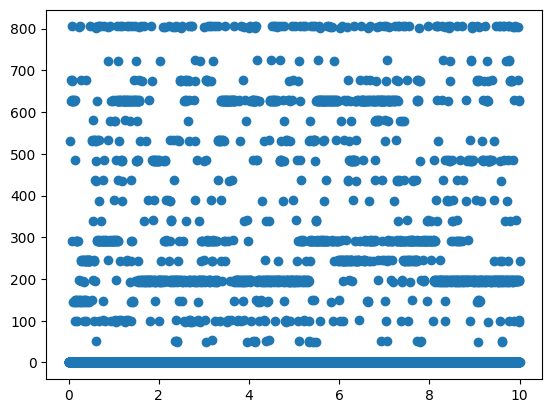

In [4]:
plt.scatter(new_times, new_firings)

In [5]:
K = 2
N = 805
T = len(new_times)
seed = 12345

v = np.ones(K)
u = np.ones((K, K))
w = np.ones((N + 1, K))
num_iterations = 100

pi_est, gamma_est, r_est, running_nmi, running_perc_corr_class,\
    pi_init, gamma_init, r_init = gibbs.gibbs_sampling(new_firings, v, u, w, num_iterations)

In [6]:
print("Pi_est:\n", pi_est)
print("Gamma_est:\n", gamma_est)
print("R_est:\n", r_est)

Pi_est:
 [0.70173153 0.29826847]
Gamma_est:
 [[0.798821   0.201179  ]
 [0.47446754 0.52553246]]
R_est:
 [[8.25759542e-01 6.83432456e-01]
 [2.52495635e-06 4.24044222e-06]
 [2.29765693e-06 7.80836342e-07]
 ...
 [1.25548728e-03 4.42475996e-03]
 [1.08442209e-06 4.50938451e-07]
 [2.87911568e-03 2.22699662e-02]]


In [7]:
num_iterations = 100
num_rep = 10
type_run = f'Estimating the parameters from the real data (K={K}) (z initialized through y and r)'

for K in range(2, 8):
    print(f'##################### K={K} ########################')

    v = np.ones(K)
    u = np.ones((K, K))
    w = np.ones((N + 1, K))
    
    gibbs.run_simulation_real(new_firings, T, N, K, seed,num_rep, type_run, num_iterations)

##################### K=2 ########################
Rep 0...
##########################
Estimated values for the parameters
Estimated Pi =  [0.42548383 0.57451617]
Estimated Gamma =  [[0.00162973 0.99837027]
 [0.34943997 0.65056003]]
Estimated R =  [[8.30429879e-01 7.68191035e-01]
 [2.30741718e-07 9.13972084e-09]
 [1.81619198e-06 5.42341628e-07]
 ...
 [3.14654432e-03 1.91052884e-03]
 [1.83040376e-06 3.02980327e-07]
 [2.44474178e-02 2.92535506e-03]]
Rep 1...
##########################
Estimated values for the parameters
Estimated Pi =  [0.53877113 0.46122887]
Estimated Gamma =  [[0.61600473 0.38399527]
 [0.7392161  0.2607839 ]]
Estimated R =  [[8.85025885e-01 5.90299458e-01]
 [3.26622838e-06 7.62315544e-06]
 [8.41779828e-07 6.80039451e-06]
 ...
 [7.41399449e-04 4.91199356e-03]
 [2.36369729e-06 7.11369425e-07]
 [1.48486879e-03 2.21608955e-02]]
Rep 2...
##########################
Estimated values for the parameters
Estimated Pi =  [0.46863998 0.53136002]
Estimated Gamma =  [[0.56324483 0.4

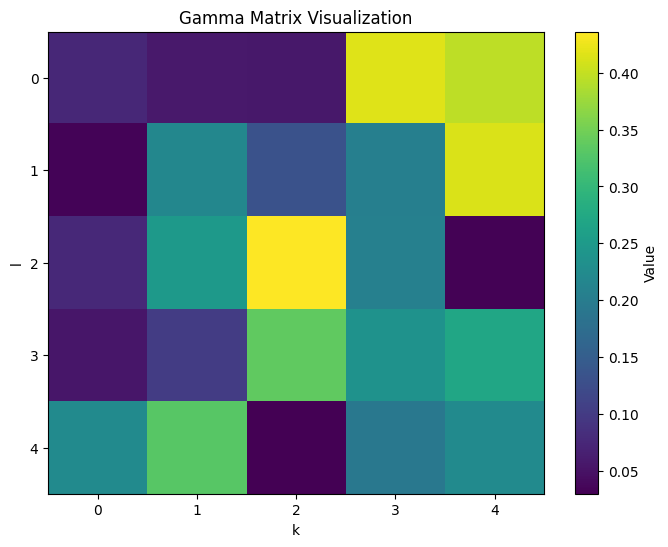

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def color_matrix(matrix):
  """
  Visualizes a matrix with colors based on the values.
  
  Parameters:
  - matrix: 2D NumPy array
  
  Returns:
  - A colored visualization of the matrix.
  """
  plt.figure(figsize=(8, 6))
  plt.imshow(matrix, cmap='viridis', aspect='auto')  # You can change the colormap ('viridis') if desired.
  plt.colorbar(label="Value")
  
  # Add text annotations
  plt.title("Gamma Matrix Visualization")
  plt.xlabel("k")
  plt.ylabel("l")
  plt.show()

# Example usage:
matrix = np.array([[0.07511801, 0.05749745, 0.05547551, 0.41571147, 0.39619756],
       [0.03312027, 0.2177277 , 0.13189871, 0.20451392, 0.4127394 ],
       [0.07597421, 0.24975707, 0.43606482, 0.2063614 , 0.0318425 ],
       [0.05398191, 0.10245676, 0.33683803, 0.23643831, 0.270285  ],
       [0.22345151, 0.33032513, 0.02974676, 0.19187121, 0.22460539]]
)

color_matrix(matrix)


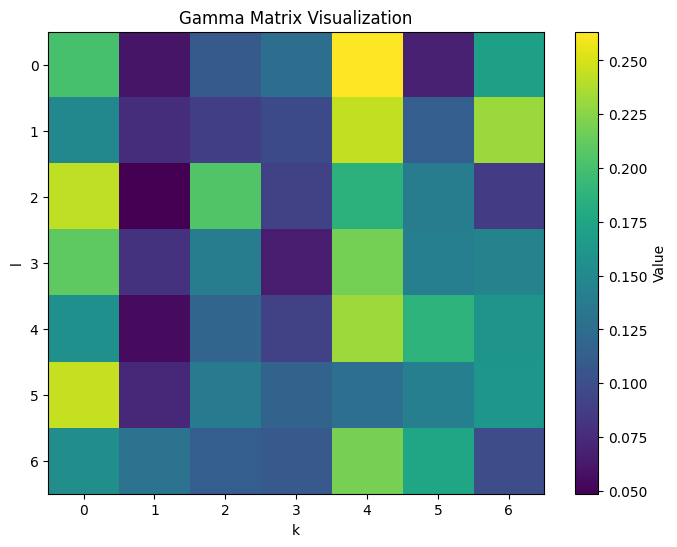

In [15]:
arrays = [np.array([[0.188928  , 0.05048653, 0.08834518, 0.26010317, 0.19807189,
        0.17174612, 0.04231912],
       [0.2654645 , 0.03917151, 0.21474222, 0.02188464, 0.21852349,
        0.21031462, 0.02989903],
       [0.09948094, 0.00976495, 0.61331778, 0.02716276, 0.07664912,
        0.15768512, 0.01593933],
       [0.06369061, 0.25745874, 0.11062727, 0.09065847, 0.2015301 ,
        0.01573923, 0.26029558],
       [0.0768893 , 0.00085375, 0.20862565, 0.12217299, 0.43914868,
        0.09554434, 0.0567653 ],
       [0.3476992 , 0.04132315, 0.11620753, 0.02427921, 0.0921041 ,
        0.36223405, 0.01615274],
       [0.44589367, 0.04599546, 0.14268781, 0.12325605, 0.17611133,
        0.03324294, 0.03281274]]), np.array([[3.16700786e-02, 5.54503368e-03, 3.53389349e-01, 4.73339816e-02,
        3.62974685e-01, 5.19784170e-02, 1.47108456e-01],
       [1.36349639e-03, 1.37638260e-02, 3.53693321e-02, 4.58398635e-03,
        5.93468885e-01, 4.82186196e-02, 3.03231854e-01],
       [6.88947226e-04, 1.36168271e-02, 4.56045029e-01, 2.82187554e-04,
        3.62155589e-01, 7.76364307e-02, 8.95749888e-02],
       [5.78761156e-02, 4.13140015e-02, 1.03079471e-01, 2.23603640e-02,
        6.81291499e-01, 4.46945500e-02, 4.93839984e-02],
       [6.42223026e-04, 1.31161966e-02, 1.12620590e-01, 7.38709644e-03,
        4.43561081e-01, 1.56158823e-02, 4.07056930e-01],
       [2.55402141e-03, 3.52450948e-02, 2.35284204e-01, 1.17543234e-03,
        1.66842248e-01, 1.03890014e-02, 5.48509998e-01],
       [7.29726821e-03, 2.17248407e-02, 6.18850856e-02, 5.57050088e-03,
        5.60205174e-01, 2.69459850e-02, 3.16371146e-01]]), np.array([[0.22652241, 0.0536332 , 0.13984375, 0.18986895, 0.08283937,
        0.00855752, 0.29873479],
       [0.27968869, 0.02511683, 0.02601585, 0.06898002, 0.22129174,
        0.083579  , 0.29532787],
       [0.31774588, 0.04513385, 0.14697361, 0.22011357, 0.14575617,
        0.04772971, 0.0765472 ],
       [0.47827575, 0.0077576 , 0.05442131, 0.11284156, 0.04763561,
        0.10172608, 0.19734209],
       [0.11645261, 0.05122172, 0.02441099, 0.19905057, 0.17880737,
        0.06656825, 0.36348849],
       [0.52321558, 0.00069317, 0.04813464, 0.0582641 , 0.32601472,
        0.04031772, 0.00336007],
       [0.66789828, 0.04755599, 0.11575554, 0.09894194, 0.03213678,
        0.02477049, 0.01294098]]), np.array([[0.18266842, 0.14859042, 0.01268232, 0.22195995, 0.23597127,
        0.09982327, 0.09830436],
       [0.12142614, 0.09560667, 0.03664113, 0.12846385, 0.27845216,
        0.08147667, 0.25793338],
       [0.38280497, 0.02090958, 0.2531948 , 0.03231354, 0.19054164,
        0.03673076, 0.08350471],
       [0.29099361, 0.01128164, 0.25624638, 0.01533253, 0.20170089,
        0.20655224, 0.0178927 ],
       [0.01022378, 0.1361454 , 0.19094133, 0.03179127, 0.34209783,
        0.27213592, 0.01666446],
       [0.41078422, 0.1602413 , 0.22457357, 0.0656736 , 0.00799202,
        0.12049373, 0.01024156],
       [0.08580444, 0.39533223, 0.11331744, 0.00927634, 0.21420354,
        0.02869143, 0.15337459]]), np.array([[1.20105220e-02, 1.78325668e-01, 1.49603483e-02, 1.36774421e-02,
        7.41816925e-01, 5.09104288e-04, 3.86999900e-02],
       [2.40031671e-02, 1.42244614e-01, 4.10423910e-02, 6.73120156e-02,
        7.00013325e-01, 6.69125468e-03, 1.86932326e-02],
       [2.49169834e-02, 7.15332120e-04, 2.28336993e-02, 8.02790331e-02,
        8.63349181e-01, 6.35793098e-03, 1.54784025e-03],
       [3.85623889e-02, 1.31074670e-01, 1.61785955e-02, 1.12368125e-01,
        6.89708699e-01, 3.95030479e-03, 8.15721613e-03],
       [9.15012876e-02, 1.67929302e-01, 3.19053109e-03, 1.51602252e-01,
        4.69413796e-01, 1.82051001e-02, 9.81577305e-02],
       [1.47023000e-01, 3.83745276e-02, 1.17990858e-02, 3.83606290e-01,
        2.25568261e-02, 3.23367589e-02, 3.64303511e-01],
       [1.83219595e-02, 4.96409093e-01, 1.12402629e-02, 2.75930766e-03,
        4.31032826e-01, 2.28295431e-02, 1.74070088e-02]]), np.array([[0.46420915, 0.07976959, 0.06101656, 0.30651105, 0.01153428,
        0.02849438, 0.04846499],
       [0.00547797, 0.00292158, 0.07890657, 0.24325689, 0.1070797 ,
        0.1944413 , 0.367916  ],
       [0.10940817, 0.23433763, 0.15593025, 0.20297365, 0.09897589,
        0.10167372, 0.0967007 ],
       [0.07120937, 0.03454025, 0.29164607, 0.22252857, 0.07120007,
        0.18126881, 0.12760686],
       [0.14146464, 0.12656889, 0.20592812, 0.31092995, 0.11824396,
        0.01943111, 0.07743333],
       [0.33815159, 0.14443893, 0.05020457, 0.01357688, 0.17939408,
        0.16603557, 0.10819838],
       [0.21574544, 0.05893443, 0.1634752 , 0.38451341, 0.02873171,
        0.03434723, 0.11425257]]), np.array([[3.47813828e-01, 3.45677719e-02, 1.72326946e-01, 4.85920396e-02,
        3.40023452e-01, 5.39647286e-02, 2.71123363e-03],
       [5.99275421e-01, 2.28715336e-03, 1.31047788e-01, 5.86382021e-02,
        1.34811648e-01, 7.20621754e-02, 1.87761167e-03],
       [5.89197237e-01, 1.14490484e-01, 2.16863218e-01, 2.64415573e-02,
        2.71500092e-02, 2.56408516e-02, 2.16643506e-04],
       [6.07226054e-01, 2.06981792e-02, 1.94364887e-01, 2.71531235e-02,
        9.69088619e-02, 5.02632881e-02, 3.38560646e-03],
       [3.24583315e-01, 3.41932620e-02, 3.04998140e-01, 7.75297830e-02,
        9.58494737e-02, 1.60126290e-01, 2.71973707e-03],
       [2.61982254e-01, 1.28323113e-01, 1.90511916e-01, 1.46665627e-01,
        1.62102361e-01, 1.09949005e-01, 4.65724411e-04],
       [5.05320699e-03, 8.46543614e-03, 2.09316622e-02, 1.37874769e-01,
        2.06331253e-01, 6.20098067e-01, 1.24560596e-03]]), np.array([[0.00136615, 0.01330239, 0.03192548, 0.03924045, 0.4669527 ,
        0.06123285, 0.38598   ],
       [0.07587673, 0.00456209, 0.29735087, 0.01022026, 0.12190947,
        0.04219212, 0.44788845],
       [0.21167307, 0.03611546, 0.12232849, 0.0776778 , 0.07028436,
        0.29477129, 0.18714953],
       [0.20933223, 0.02977525, 0.16489372, 0.00940384, 0.14988372,
        0.41773435, 0.01897689],
       [0.26933204, 0.00717982, 0.11428861, 0.0032019 , 0.18510392,
        0.17380056, 0.24709315],
       [0.05476951, 0.06650235, 0.31120152, 0.00554022, 0.30122785,
        0.13312155, 0.12763701],
       [0.04824232, 0.01121824, 0.40634983, 0.00863833, 0.44244505,
        0.03473997, 0.04836625]]), np.array([[0.33507656, 0.0008175 , 0.19276252, 0.09186034, 0.08858707,
        0.09416664, 0.19672937],
       [0.0228984 , 0.00238554, 0.02677186, 0.35854884, 0.01911364,
        0.0114738 , 0.55880792],
       [0.37069124, 0.00372071, 0.01349235, 0.22942758, 0.0022961 ,
        0.14486203, 0.23550998],
       [0.07338498, 0.00233153, 0.09617838, 0.03303169, 0.02382807,
        0.03206764, 0.73917772],
       [0.1613076 , 0.00586287, 0.00355328, 0.00475861, 0.00624859,
        0.76263487, 0.05563418],
       [0.09180666, 0.01755145, 0.02536552, 0.38126905, 0.00643068,
        0.21672859, 0.26084805],
       [0.02799462, 0.00926973, 0.04444417, 0.30669226, 0.04978679,
        0.27537313, 0.28643931]]), np.array([[0.22224472, 0.04277826, 0.02768354, 0.04649261, 0.10444559,
        0.11043656, 0.44591874],
       [0.09532994, 0.44322877, 0.00134311, 0.00790485, 0.04370001,
        0.38002974, 0.02846358],
       [0.31949414, 0.00831148, 0.04809368, 0.01561677, 0.02917034,
        0.50125143, 0.07806217],
       [0.21102943, 0.26298356, 0.11042058, 0.01284056, 0.02222507,
        0.35693845, 0.02356235],
       [0.36922572, 0.00759673, 0.0153701 , 0.00144157, 0.03891294,
        0.29381484, 0.2736381 ],
       [0.26458904, 0.09034565, 0.1499521 , 0.09036604, 0.00922275,
        0.22073437, 0.17479005],
       [0.02466839, 0.20920935, 0.04447442, 0.00645615, 0.04940741,
        0.65702061, 0.00876366]])]

mean_array = np.mean(arrays, axis=0)
color_matrix(mean_array)

In [16]:
arrays = [np.array([[0.200614  , 0.56117758, 0.23568894, 0.00251948],
       [0.16496499, 0.23130693, 0.47679999, 0.12692808],
       [0.0365335 , 0.31626375, 0.09367048, 0.55353227],
       [0.0441075 , 0.16886577, 0.30872303, 0.47830369]]), np.array([[0.73816971, 0.094802  , 0.10117353, 0.06585476],
       [0.27993862, 0.54692271, 0.11483806, 0.05830061],
       [0.24499007, 0.68298661, 0.0697221 , 0.00230123],
       [0.56681342, 0.05655404, 0.32739508, 0.04923745]]), np.array([[0.11298696, 0.20628227, 0.35226037, 0.3284704 ],
       [0.31898011, 0.29804624, 0.27192091, 0.11105274],
       [0.23939005, 0.23922327, 0.39641162, 0.12497506],
       [0.06731842, 0.10822266, 0.75001041, 0.07444851]]), np.array([[0.10976551, 0.23854883, 0.06196277, 0.58972289],
       [0.01723273, 0.34372309, 0.08613219, 0.55291198],
       [0.15484372, 0.58031948, 0.01014874, 0.25468805],
       [0.12452385, 0.17002817, 0.04234575, 0.66310224]]), np.array([[0.176546  , 0.75599431, 0.0141687 , 0.053291  ],
       [0.14926643, 0.78914094, 0.03307402, 0.02851861],
       [0.04505376, 0.84431493, 0.02440321, 0.0862281 ],
       [0.07739195, 0.6493881 , 0.2100021 , 0.06321784]]), np.array([[0.11198156, 0.44987042, 0.10775123, 0.33039679],
       [0.21477003, 0.57422712, 0.1742802 , 0.03672265],
       [0.03177864, 0.33001457, 0.21640338, 0.42180341],
       [0.02728423, 0.13372665, 0.14151621, 0.69747291]]), np.array([[0.05880921, 0.04712629, 0.06457834, 0.82948616],
       [0.35305714, 0.17349896, 0.05507166, 0.41837224],
       [0.34832746, 0.04067125, 0.0944777 , 0.5165236 ],
       [0.31760512, 0.34618271, 0.09516414, 0.24104803]]), np.array([[0.40171482, 0.0852491 , 0.50615267, 0.0068834 ],
       [0.12946574, 0.3360675 , 0.3784089 , 0.15605786],
       [0.17572991, 0.15802351, 0.33009442, 0.33615216],
       [0.22796397, 0.01618661, 0.66138345, 0.09446596]]), np.array([[4.85391752e-01, 2.89312459e-01, 7.95906449e-02, 1.45705144e-01],
       [7.45723011e-01, 5.49466210e-04, 1.79632477e-01, 7.40950458e-02],
       [6.24599751e-01, 9.44787161e-02, 8.43741726e-02, 1.96547360e-01],
       [5.27447449e-01, 2.18546164e-01, 1.43431452e-01, 1.10574935e-01]]), np.array([[0.05696826, 0.58640321, 0.14763416, 0.20899437],
       [0.02102816, 0.02886444, 0.60255075, 0.34755665],
       [0.16260382, 0.18157917, 0.50469144, 0.15112558],
       [0.04060509, 0.75932533, 0.0262131 , 0.17385648]])]

mean_array = np.mean(arrays, axis=0)

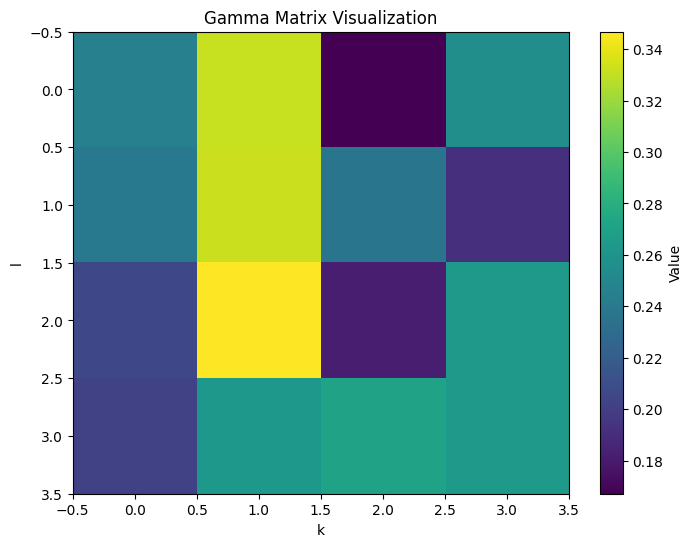

In [17]:
color_matrix(mean_array)

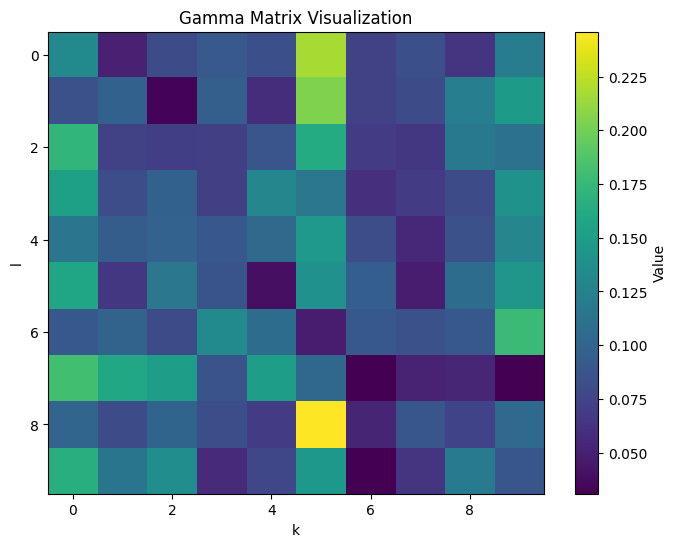

In [18]:
arrays = [np.array([[5.66506523e-02, 6.55276421e-03, 1.07582778e-01, 1.67627815e-02,
        7.13883802e-04, 1.85196717e-04, 8.28219617e-02, 7.11052354e-02,
        1.02538674e-01, 5.55086073e-01],
       [4.47503211e-02, 1.55628501e-02, 6.47429699e-03, 2.56536162e-03,
        2.12727036e-03, 3.84846303e-02, 4.71519133e-02, 2.99588645e-02,
        4.31873024e-02, 7.69737189e-01],
       [4.27929519e-01, 1.25725343e-02, 1.75383095e-01, 4.00345998e-02,
        2.56159101e-04, 9.23685610e-03, 8.64784258e-02, 1.35642282e-01,
        5.95689240e-02, 5.28976048e-02],
       [1.86258776e-01, 1.31856212e-02, 4.84372239e-01, 3.96679988e-04,
        3.35679271e-03, 1.28696844e-02, 6.43663583e-02, 2.52819097e-02,
        1.50747262e-01, 5.91646763e-02],
       [2.93437722e-02, 3.03263948e-02, 1.96999884e-01, 2.35987364e-01,
        4.63823986e-02, 3.37550855e-03, 3.35941043e-01, 6.50738822e-02,
        4.56784587e-02, 1.08912942e-02],
       [4.12031139e-01, 2.43466772e-02, 3.44412693e-01, 3.50224361e-02,
        1.58500946e-02, 2.25933321e-03, 2.93208335e-02, 3.48445850e-02,
        9.93999677e-02, 2.51224028e-03],
       [4.28210765e-01, 6.42499234e-03, 4.39220953e-02, 3.70259188e-02,
        3.39082636e-03, 4.23845796e-02, 5.53495272e-02, 3.32928731e-02,
        1.50984722e-03, 3.48488576e-01],
       [5.69829742e-01, 2.24153399e-02, 2.09358460e-01, 1.39742465e-02,
        9.57749675e-04, 1.38582070e-02, 6.05395484e-02, 3.92538662e-02,
        6.00257270e-02, 9.78711369e-03],
       [2.84634617e-01, 7.15410176e-03, 3.33333156e-01, 4.31345755e-03,
        2.19704046e-03, 3.27295527e-02, 9.09790493e-02, 4.15470745e-02,
        6.52448565e-02, 1.37867094e-01],
       [2.42611891e-01, 1.83679848e-02, 4.76708937e-01, 1.30692092e-02,
        1.15375704e-03, 6.03745865e-03, 1.17097500e-02, 1.12955235e-01,
        6.95279110e-02, 4.78578665e-02]]), np.array([[1.78848925e-01, 2.13848463e-03, 1.61790633e-01, 1.39590785e-02,
        1.66784220e-04, 5.86022855e-01, 1.71236866e-02, 2.52319177e-03,
        1.17974979e-02, 2.56288631e-02],
       [9.31142719e-02, 9.98938394e-04, 7.95527400e-02, 4.92618968e-03,
        5.35365584e-03, 6.81072113e-01, 2.48615753e-02, 2.25286653e-02,
        8.35260857e-02, 4.06576470e-03],
       [1.75908812e-01, 4.56036783e-04, 1.49542486e-01, 2.21663573e-02,
        2.18758519e-04, 5.00876351e-01, 3.17853866e-03, 8.93549789e-03,
        1.35613049e-01, 3.10411267e-03],
       [5.11595361e-01, 1.17843139e-04, 2.38900834e-01, 7.34122450e-04,
        5.08185549e-03, 9.73499552e-02, 5.87850591e-03, 4.37350069e-02,
        6.69440743e-02, 2.96624419e-02],
       [1.02630118e-01, 2.98318005e-04, 3.42185721e-01, 1.74716093e-02,
        3.82411752e-03, 2.69451121e-01, 1.65422467e-02, 2.80210386e-02,
        1.92575724e-01, 2.69999857e-02],
       [2.06141926e-01, 3.45214571e-04, 5.25366001e-01, 6.67898472e-02,
        8.68298399e-04, 1.31730868e-01, 6.24959316e-04, 1.73909533e-02,
        4.92319491e-02, 1.50998319e-03],
       [1.46550716e-01, 1.04202001e-03, 5.86045346e-01, 1.71014495e-02,
        8.40331819e-04, 7.79781559e-02, 7.05317416e-03, 7.79305322e-03,
        7.29149122e-02, 8.26808411e-02],
       [1.02045069e-02, 5.91166943e-03, 7.71388249e-01, 4.17437137e-02,
        5.41857763e-03, 8.22405094e-02, 5.09252727e-04, 2.41642389e-02,
        3.83516628e-02, 2.00676198e-02],
       [5.97182954e-03, 3.89660587e-03, 5.57578779e-01, 3.26129496e-02,
        1.04561330e-02, 3.34756827e-01, 2.43821318e-03, 8.42201019e-03,
        1.13287461e-02, 3.25379069e-02],
       [3.20035236e-01, 2.81966920e-03, 3.50860736e-01, 2.36815556e-02,
        2.72013499e-03, 9.38270870e-02, 9.84846071e-03, 1.93730307e-03,
        1.86509968e-01, 7.75984970e-03]]), np.array([[7.19202419e-02, 1.33562427e-02, 4.37351363e-01, 8.02429660e-04,
        1.82073218e-01, 4.12824487e-03, 2.00753370e-02, 4.98254689e-02,
        1.04429758e-01, 1.16037697e-01],
       [1.85776460e-03, 2.34086400e-02, 1.54652916e-01, 1.37255920e-02,
        1.49725287e-01, 1.07768246e-01, 7.87184075e-02, 1.83785647e-03,
        2.86954754e-02, 4.39609815e-01],
       [4.23040534e-02, 3.63473243e-02, 1.59268728e-01, 1.11980945e-04,
        4.83567423e-02, 4.74362815e-02, 1.12581807e-01, 3.20841948e-02,
        1.30700440e-01, 3.90808448e-01],
       [3.59945527e-02, 1.70476939e-02, 6.48036220e-02, 1.33042013e-05,
        7.79715388e-02, 5.68092811e-02, 6.03936945e-02, 9.70740178e-02,
        1.30037514e-02, 5.76888544e-01],
       [9.43028687e-02, 2.21723093e-02, 3.35094763e-01, 5.57839126e-03,
        1.77713132e-01, 6.84162093e-03, 1.71073162e-02, 6.32708667e-02,
        1.27412535e-02, 2.65177478e-01],
       [1.74057991e-02, 1.01783755e-01, 1.22170000e-01, 2.13021203e-03,
        7.53182695e-02, 1.05820217e-02, 1.04014990e-03, 5.07231254e-02,
        1.94918737e-01, 4.23927930e-01],
       [2.87885847e-02, 5.12647980e-02, 9.11920999e-02, 1.23707064e-04,
        1.51841262e-01, 3.02881872e-03, 4.15834712e-03, 3.03225241e-02,
        1.23362482e-04, 6.39156496e-01],
       [3.73437553e-02, 2.25737001e-01, 4.49186573e-01, 1.65272219e-04,
        4.91769000e-02, 1.04879881e-01, 1.33602635e-02, 3.49854462e-02,
        7.86140617e-02, 6.55084647e-03],
       [6.60281898e-02, 2.75249426e-02, 5.67108270e-02, 4.34038447e-04,
        4.42403193e-02, 7.11157284e-02, 4.84338913e-02, 4.28667178e-02,
        2.10254518e-01, 4.32390828e-01],
       [1.01931199e-02, 1.16686564e-02, 3.49810438e-01, 6.82091095e-04,
        1.32495250e-01, 1.63927215e-02, 5.56006934e-04, 5.83482452e-02,
        3.08692847e-02, 3.88984186e-01]]), np.array([[0.02675951, 0.16037708, 0.00449847, 0.17384024, 0.16823746,
        0.06305482, 0.01790808, 0.16291772, 0.15167847, 0.07072816],
       [0.08542492, 0.3293752 , 0.01352226, 0.02110094, 0.08750236,
        0.01943766, 0.0984461 , 0.02862162, 0.30790973, 0.0086592 ],
       [0.06877454, 0.0774637 , 0.01071702, 0.03024294, 0.11250303,
        0.0544555 , 0.04709217, 0.00285751, 0.47794122, 0.11795237],
       [0.00999062, 0.36736404, 0.00390167, 0.07211694, 0.22764382,
        0.02804022, 0.00097239, 0.04416813, 0.11068892, 0.13511326],
       [0.03194416, 0.1824824 , 0.00510776, 0.08706326, 0.09368281,
        0.00895674, 0.11151371, 0.01591884, 0.35267565, 0.11065467],
       [0.16229996, 0.08628048, 0.00735245, 0.00535677, 0.1358436 ,
        0.00633078, 0.25234953, 0.0066581 , 0.33248916, 0.00503916],
       [0.03084812, 0.25606695, 0.01055249, 0.0101392 , 0.14322959,
        0.00770074, 0.2202928 , 0.00057553, 0.31404319, 0.0065514 ],
       [0.05098009, 0.35211214, 0.00850081, 0.12743345, 0.35189945,
        0.00426189, 0.00333191, 0.00537373, 0.06016102, 0.03594551],
       [0.00443457, 0.31190555, 0.00522494, 0.14261149, 0.07060168,
        0.06895823, 0.00269254, 0.04636734, 0.2580837 , 0.08911997],
       [0.06275798, 0.0960791 , 0.0153947 , 0.02056993, 0.06318608,
        0.00080449, 0.19117626, 0.01655483, 0.40550845, 0.12796819]]), np.array([[2.88132238e-01, 1.51400769e-02, 4.64654768e-02, 1.71408164e-02,
        4.27815284e-02, 1.59336621e-01, 4.92675681e-02, 2.97565704e-01,
        3.45179149e-02, 4.96520556e-02],
       [2.64849015e-02, 1.72559108e-01, 3.55442753e-02, 1.10067157e-01,
        1.90424118e-02, 3.73841471e-02, 2.64789109e-02, 2.04732151e-02,
        5.30749237e-01, 2.12166361e-02],
       [4.24097854e-01, 7.08030944e-03, 2.07743667e-02, 5.61693494e-02,
        2.69001760e-01, 1.12152619e-01, 2.04737984e-02, 1.05079491e-03,
        5.74919873e-02, 3.17071612e-02],
       [9.01719197e-02, 3.87371268e-02, 5.22172808e-02, 7.65321917e-03,
        2.59682378e-01, 1.15650525e-02, 3.13383213e-01, 1.36951856e-01,
        2.65399611e-02, 6.30979930e-02],
       [2.49380370e-01, 4.03643089e-02, 5.09146453e-03, 5.53463471e-02,
        4.09352186e-01, 8.65747933e-03, 5.11929908e-03, 1.90694128e-01,
        2.37563443e-02, 1.22380729e-02],
       [4.33967331e-01, 1.60698791e-02, 1.46723771e-02, 2.90426632e-02,
        8.58190902e-04, 1.37908237e-01, 9.47983444e-04, 5.68653777e-02,
        3.35187223e-02, 2.76149239e-01],
       [5.72207723e-03, 1.36126071e-01, 2.52181315e-02, 2.47156916e-02,
        6.00304185e-02, 3.59496761e-02, 1.99183177e-01, 1.82371266e-01,
        7.27619211e-02, 2.57921570e-01],
       [4.47337855e-01, 8.56628040e-02, 3.25693435e-02, 6.22409236e-03,
        2.23178447e-01, 1.51772312e-01, 9.10089425e-03, 2.01421835e-02,
        1.62280502e-02, 7.78401791e-03],
       [1.74286464e-01, 3.25040650e-02, 2.85143142e-02, 7.26862408e-03,
        2.17703704e-01, 2.16813653e-01, 3.71580831e-02, 2.20244230e-01,
        1.57726843e-04, 6.53491353e-02],
       [1.60621508e-01, 1.68854441e-01, 3.70755614e-02, 2.07072571e-02,
        1.96136709e-02, 1.79154842e-01, 1.65728892e-02, 1.37066808e-02,
        3.78898624e-01, 4.79452496e-03]]), np.array([[1.11777436e-02, 1.76401574e-01, 9.51171337e-03, 1.49328448e-01,
        2.60411413e-01, 3.06414559e-01, 1.22062181e-02, 4.42072180e-02,
        1.33462774e-02, 1.69948342e-02],
       [1.11623577e-02, 1.31813097e-01, 3.76788281e-03, 3.22959385e-01,
        7.98180087e-02, 1.24236699e-01, 7.06111772e-03, 7.16219647e-02,
        2.05135926e-01, 4.24235606e-02],
       [3.01038423e-03, 2.82162536e-01, 2.67873130e-02, 4.23520378e-02,
        9.47680304e-03, 2.86769676e-01, 3.97400214e-02, 1.14398740e-01,
        1.46720658e-01, 4.85818301e-02],
       [3.67062328e-02, 1.32335509e-02, 6.96288666e-02, 1.80396356e-01,
        3.89397995e-01, 3.57742505e-02, 2.05555022e-02, 6.25894639e-03,
        1.92928006e-01, 5.51202931e-02],
       [7.75471214e-02, 3.03266004e-01, 5.73437699e-03, 2.39463416e-01,
        4.27365249e-02, 2.93496930e-01, 1.67441948e-03, 1.07551096e-03,
        2.20767878e-02, 1.29289080e-02],
       [1.71913868e-02, 2.11579651e-01, 2.47689324e-02, 1.30467616e-01,
        2.32101249e-02, 3.41639980e-01, 1.71642493e-02, 3.57968162e-02,
        1.14715842e-01, 8.34654019e-02],
       [1.59848734e-02, 1.68978862e-01, 7.01107936e-03, 4.40695765e-01,
        1.69054211e-01, 4.19443131e-02, 6.32638533e-03, 4.23172440e-03,
        1.34960060e-01, 1.08127269e-02],
       [2.80511527e-02, 4.92425578e-01, 3.75761242e-03, 1.67365432e-02,
        2.16830333e-01, 6.62456765e-02, 2.58635517e-02, 8.86839586e-02,
        2.32938726e-02, 3.81117215e-02],
       [3.01359016e-03, 2.44104968e-03, 5.70216033e-03, 3.93399890e-01,
        1.04278230e-01, 4.18408614e-01, 3.34486291e-03, 2.58598906e-02,
        4.19474352e-02, 1.60427632e-03],
       [7.88812908e-03, 3.99053075e-01, 5.47130399e-04, 3.46981685e-02,
        1.02969141e-01, 4.02142916e-01, 2.59269882e-02, 4.01477064e-04,
        2.41232024e-02, 2.24977273e-03]]), np.array([[0.2017558 , 0.0202664 , 0.02684436, 0.43708139, 0.00827647,
        0.10040706, 0.0303302 , 0.02847981, 0.13095805, 0.01560046],
       [0.07285638, 0.0841794 , 0.0062083 , 0.40652483, 0.15938106,
        0.16112235, 0.03208545, 0.05462465, 0.01437551, 0.00864205],
       [0.19083155, 0.05506265, 0.04295922, 0.34516265, 0.08994203,
        0.02156996, 0.02728592, 0.01903254, 0.02259156, 0.18556192],
       [0.08636656, 0.01168653, 0.035603  , 0.35108159, 0.0197084 ,
        0.17042625, 0.03019363, 0.04778095, 0.13390053, 0.11325255],
       [0.22556605, 0.01546755, 0.02762483, 0.17931838, 0.01049097,
        0.38432563, 0.02554108, 0.01422386, 0.07733884, 0.0401028 ],
       [0.01284211, 0.02395566, 0.05160819, 0.45842901, 0.02371604,
        0.05772778, 0.00847929, 0.03542779, 0.05294643, 0.27486769],
       [0.05341903, 0.00162947, 0.01230478, 0.53006532, 0.01154876,
        0.11442886, 0.16794979, 0.00968496, 0.03272051, 0.06624852],
       [0.01239262, 0.00427317, 0.0207252 , 0.59728729, 0.03818425,
        0.06591232, 0.10764614, 0.02133277, 0.03174881, 0.10049743],
       [0.02930831, 0.07105267, 0.00299207, 0.1142886 , 0.04684759,
        0.57615569, 0.05809494, 0.01436593, 0.05941943, 0.02747477],
       [0.08340762, 0.0064248 , 0.11374827, 0.31778886, 0.0514917 ,
        0.15343215, 0.00513786, 0.06599132, 0.0299305 , 0.17264692]]), np.array([[2.74859532e-03, 1.26107290e-02, 2.08448338e-03, 5.08193774e-04,
        1.00887126e-01, 7.97587245e-01, 2.05795131e-02, 1.61123835e-02,
        1.12246483e-02, 3.56570828e-02],
       [2.47363570e-03, 3.42719077e-02, 1.25287696e-02, 3.37731889e-02,
        7.43055453e-02, 7.62327546e-01, 5.04819956e-04, 3.04119689e-02,
        1.44626774e-02, 3.49399401e-02],
       [1.46702102e-03, 5.21393848e-02, 8.79824560e-02, 3.52623966e-03,
        1.84092653e-01, 5.13279511e-01, 1.09952724e-02, 2.77033534e-02,
        4.50660931e-02, 7.37480149e-02],
       [5.89682374e-04, 8.83681430e-02, 1.29940939e-02, 1.48686910e-02,
        1.23741523e-01, 6.67967565e-01, 3.22210970e-03, 3.68426356e-02,
        3.76324008e-02, 1.37731555e-02],
       [4.80989649e-03, 2.42761620e-03, 1.66253691e-02, 1.28753856e-02,
        2.58698513e-01, 3.49748456e-01, 2.71942186e-03, 4.51212224e-02,
        3.20190449e-02, 2.74955075e-01],
       [1.92493470e-04, 7.55875804e-02, 4.43106016e-02, 1.25375444e-02,
        1.12697165e-01, 5.36174059e-01, 1.85656637e-02, 5.03904515e-02,
        1.17485120e-01, 3.20593216e-02],
       [1.43548354e-03, 6.06694805e-02, 2.85729414e-02, 1.13231869e-01,
        4.67811470e-01, 4.59049941e-02, 1.25676818e-02, 7.82495559e-02,
        6.26539130e-02, 1.28902611e-01],
       [3.62163964e-03, 2.28204161e-02, 1.42046683e-03, 4.04034169e-02,
        5.36291788e-01, 3.75179657e-01, 3.18821931e-03, 8.50818385e-03,
        8.22686220e-03, 3.39350259e-04],
       [4.83065584e-04, 3.07795403e-02, 6.07639324e-03, 2.18265972e-02,
        1.22329570e-01, 6.78843178e-01, 4.62276312e-03, 6.90129134e-03,
        5.89497544e-02, 6.91878470e-02],
       [1.01667669e-02, 5.76868008e-02, 7.14757952e-04, 8.57960838e-03,
        3.73714588e-01, 4.56085412e-01, 1.71616374e-04, 1.38996616e-02,
        2.60607278e-02, 5.29200604e-02]]), np.array([[0.03279634, 0.09630072, 0.01429318, 0.02067356, 0.01019049,
        0.00545944, 0.3227517 , 0.15156984, 0.04757797, 0.29838677],
       [0.06119747, 0.18303621, 0.01068651, 0.02976746, 0.00069671,
        0.06926862, 0.01946228, 0.50577817, 0.00116494, 0.11894163],
       [0.02555078, 0.19331938, 0.005151  , 0.01946101, 0.01183169,
        0.01227165, 0.26102683, 0.22912381, 0.04448833, 0.19777551],
       [0.14043062, 0.27002612, 0.0099739 , 0.01859894, 0.05460143,
        0.02968558, 0.06666321, 0.028347  , 0.04777544, 0.33389776],
       [0.02412548, 0.3360595 , 0.03534484, 0.02388239, 0.00293222,
        0.01586408, 0.06453988, 0.08483732, 0.05676613, 0.35564815],
       [0.00513639, 0.11577812, 0.02275959, 0.00179229, 0.0054165 ,
        0.0077352 , 0.36337137, 0.12520343, 0.05778268, 0.29502443],
       [0.0598368 , 0.30902492, 0.00306373, 0.00092692, 0.01104773,
        0.06180297, 0.14570722, 0.19505131, 0.12523973, 0.08829869],
       [0.00615425, 0.37317841, 0.00414754, 0.00258868, 0.00657252,
        0.06472346, 0.04746747, 0.23318121, 0.22034221, 0.04164425],
       [0.00721726, 0.31624669, 0.00463342, 0.00648222, 0.02224447,
        0.0133969 , 0.17815713, 0.27153253, 0.02288183, 0.15720756],
       [0.03906279, 0.37075948, 0.01694358, 0.06006162, 0.00063567,
        0.03545171, 0.03168286, 0.33684681, 0.04400789, 0.06454759]]), np.array([[4.67459168e-01, 1.83211139e-03, 1.35780784e-03, 8.03320310e-02,
        6.04134403e-02, 1.58575292e-01, 1.53685778e-01, 1.35540117e-02,
        2.91040627e-02, 3.36862970e-02],
       [4.44572447e-01, 2.47116265e-03, 4.18432930e-03, 1.61685783e-02,
        1.26845668e-02, 4.40866265e-02, 3.95115216e-01, 4.32853087e-02,
        3.36917127e-03, 3.40625938e-02],
       [3.64796826e-01, 4.20331766e-03, 2.81278218e-02, 1.61140397e-01,
        1.51181831e-01, 6.94051918e-02, 7.02353597e-02, 8.53465912e-02,
        5.84335371e-02, 7.12912640e-03],
       [4.33010613e-01, 1.23623608e-03, 5.31946499e-03, 6.88463545e-02,
        1.41810155e-01, 5.02591044e-02, 2.96534282e-02, 2.25095360e-01,
        1.75410821e-02, 2.72282017e-02],
       [3.15076748e-01, 6.86294209e-03, 1.16040631e-02, 3.49194093e-02,
        9.47249444e-03, 1.27161464e-01, 2.32372955e-01, 4.20664398e-02,
        2.57924211e-02, 1.94671064e-01],
       [3.15541129e-01, 1.61603730e-03, 3.94025426e-04, 1.28771705e-01,
        9.91293128e-05, 1.66439751e-01, 2.58723983e-01, 5.88496745e-02,
        1.43045216e-02, 5.52600438e-02],
       [1.31764984e-01, 3.51048338e-03, 7.04745066e-04, 1.52881551e-01,
        4.78241703e-02, 4.66879538e-02, 8.59745387e-02, 2.98009680e-01,
        8.40692784e-02, 1.48572614e-01],
       [6.43156302e-01, 6.38846610e-03, 1.05040958e-02, 1.36662837e-02,
        7.30275405e-02, 1.08581212e-01, 4.24234279e-02, 4.95956859e-02,
        4.51567351e-03, 4.81413125e-02],
       [4.37256431e-01, 2.33913241e-03, 6.83850043e-04, 1.04879048e-01,
        4.78912559e-02, 4.76374602e-02, 1.07460944e-01, 2.07149339e-01,
        1.18645444e-02, 3.28379952e-02],
       [7.20198627e-01, 1.64277386e-02, 1.75284842e-03, 6.77750672e-02,
        2.18471595e-02, 1.12035056e-01, 2.09089072e-02, 2.05579600e-02,
        2.25068185e-03, 1.62459543e-02]])]

mean_array = np.mean(arrays, axis=0)
color_matrix(mean_array)